# 백준_15683_감시_0407: 골드 5 (23.04.06 풀이)

## 풀이방법
- 모든 경우의 수를 다 살핀다? -> 완전탐색
- DFS를 사용
- 1. 사각지대를 세는 방법
    - cctv의 개수만큼 dfs의 깊이를 설정한다.
    - cctv 번호별로 가능한 회전 방향이 다르므로, 이를 미리 dictionary로 만든다.
    - watch 함수: 특정 좌표에서 가능한 회전 방향의 감시 구역을 표시한다.
    - dfs 함수에서, 모든 cctv를 돌면서 각 cctv 번호를 watch 함수에 넣어 감시 구역을 표시한다. 모든 cctv를 돌았을 때, 사각지대(0인 칸)의 최솟값으로 갱신한다.
- 2. 초기 빈칸 - 감시 구역 = 사각지대를 세는 방법
    - set을 이용하여(중복 제거) 각 cctv 번호별로 감시 구역을 센다.
    - 모든 감시구역의 수의 max을 구해서, 초기 빈칸에서 뺸다.

## 코드
### 1번 방법: 성공

In [ ]:
import sys
input = sys.stdin.readline

office = []
cctv = []

n, m = map(int, input().split())

for i in range(n):
    office.append(list(map(int, input().split())))
    for j in range(m):
        if 0 < office[i][j] < 6:
            cctv.append([office[i][j], i, j])

len_cctv = len(cctv)

# 북 동 남 서
dx = [-1, 0, 1, 0]
dy = [0, 1, 0, -1]

# 1: 1방향 2: 2방향(반대편) 3: 2방향(90도) 4: 3방향 5: 4방향
rotate = {1: [[0], [1], [2], [3]], 
          2: [[0, 2], [1, 3]], 
          3: [[0, 1], [1, 2], [2, 3], [3, 0]], 
          4: [[0, 1, 2], [1, 2, 3], [2, 3, 0], [3, 0, 1]], 
          5: [[0, 1, 2, 3]]}

def watch(x, y, dir, office):
    for i in dir:
        nx, ny = x, y
        while 0 <= nx < n and 0 <= ny < m and office[nx][ny] != 6:
            if office[nx][ny] == 0:
                office[nx][ny] = 7
            nx += dx[i]
            ny += dy[i]
            
def dfs(depth, office):
    global answer
    if depth == len_cctv:
        cnt = 0
        # office의 0의 갯수
        for i in office:
            cnt += i.count(0)
        answer = min(answer, cnt)
        return

    value, x, y = cctv[depth]
    for dir in rotate[value]:
        copy_office = [i[:] for i in office]
        # cctv 작동!
        watch(x, y, dir, copy_office)
        dfs(depth+1, copy_office)
    
answer = 1e9
dfs(0, office)
print(answer)

### 2번 방법: set을 이용하여 빈칸 - 감시구역. 가장 빠름!!(112ms)
- 출처: https://ryu-e.tistory.com/93
- set을 잘 활용하지를 못하겠다. 어려운 코드는 아닌데.. set 공부하자!!

In [ ]:
def watch(x, y, dir):
    """
    해당 방향으로 보기
    :return:
    """
    set_ = set()
    for d in dir:
        nx, ny = x, y
        while True:
            nx += dx[d]
            ny += dy[d]
            if nx < 0 or ny < 0 or nx >= n or ny >= m:  # 범위 넘어가면 그만 탐색
                break
            if graph[nx][ny] == 6:                      # 벽이면 그만 탐색
                break
            if graph[nx][ny] == 0:
                set_.add((nx, ny))
    return set_

def dfs(count, all_):
    """
    백트래킹으로 모든 방향 조합
    :return:
    """
    global  max_
    if count == len(cctv_watch):  # 최댓값인지 확인하기
        max_ = max(max_, len(all_))
        return

    for i in cctv_watch[count]:
        dfs(count + 1, all_.union(i))

# 북, 동, 남, 서
dx = [-1, 0, 1, 0]
dy = [0, 1, 0, -1]

n, m = map(int, input().split()) # 세로, 가로
graph = [list(map(int, input().split())) for _ in range(n)]
cctv_watch = list()   # 각 cctv가 확인 가능한 좌표를 저장
zero = 0
max_ = 0

for i in range(n):
    for j in range(m):
        if graph[i][j] == 0:
            zero += 1
                # 각 cctv가 확인 가능한 좌표를 모두 확인 
        if graph[i][j] == 1:    # 한 방향, 4가지 경우 존재
            cctv_watch.append([watch(i, j, [0]), watch(i, j, [1]), watch(i, j, [2]), watch(i, j, [3])])
        elif graph[i][j] == 2:  # 서로 반대 방향
            cctv_watch.append([watch(i, j, [0, 2]), watch(i, j, [1, 3])])
        elif graph[i][j] == 3:  # 직각
            cctv_watch.append([watch(i, j, [0, 1]), watch(i, j, [1, 2]), watch(i, j, [2, 3]), watch(i, j, [3, 0])])
        elif graph[i][j] == 4:  # 3 방향
            cctv_watch.append([watch(i, j, [0, 1, 2]), watch(i, j, [1, 2, 3]), watch(i, j, [2, 3, 0]),  watch(i, j, [3, 0, 1])])
        elif graph[i][j] == 5:  # 4방향
            cctv_watch.append([watch(i, j, [0, 1, 2, 3])])

dfs(0, set())
print(zero - max_)

## 결과
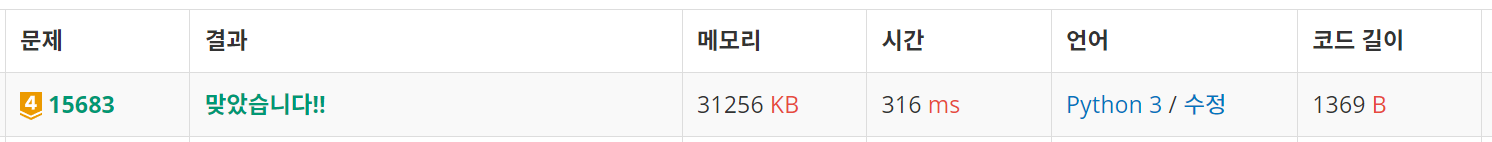